- Name: Salehe Salehe S.
- RegNo: T/UDOM/2016/07028
- BSc TE

<h1>Data imbalance</h1>

<h4>Definition</h4>

An imbalanced data means instances of one of the two classes is higher than the other, in another way, the number 
of observations is not the same for all the classes in a classification dataset.
<h6 style ="color:red">This problem is faced not only in the binary class data but also in the multi-class data.</h6>

<h4>Why data imbalanced</h4>

Because one instance of the two classes happens to contain a lot of data compare to the other that leads to give high accuracy during model training and thus a model cram the data of only single instance and therefore, model fails to correctly predict on a new data

<h4>What data are we balancing</h4>

We balances data which one instance of the classes is very greater than the other which will led to the model mispredictions

<h3>Methods used to balance data</h3>

<h4>1: Collect More Data</h4>

Collecting more data is more overlooked if you think it can lead to data balance, but sometimes colleacting more data can increase datasets with the same leading instance.

<h4>2: Changing Performance Metric</h4>

Accuracy is not the metric to use when working with an imbalanced dataset. We have seen that it is misleading therefore, there are other metrics that can correctly defines the performance of imbalanced data which are as follows 
<h6><li>Confusion Matrix</li></h6>
<p>A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).</p>
<h6><li>Precision</li></h6>
<p> A measure of a classifiers exactness or the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.</p>
<h6><li>Recall</li></h6>
<p> A measure of a classifiers completeness or  the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.</p>
<h6><li>F1: Score</li></h6>
<p>The weighted average of precision and recall.</p>
<h6><li>Kappa</li></h6>
<p>Classification accuracy normalized by the imbalance of the classes in the data.</p>
<h6><li>ROC Curves</li></h6>
<p> Like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of these values.</p>


<h4>3: Dataset Resampling</h4>
<h6>- Undersample majority class</h6>
<h6>- Oversample minority class</h6>

This means change the dataset that you use to build your predictive model to have more balanced data.
<h6>This change is called sampling your dataset and there are two main methods </h6>
<li>You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement)</li>
<li>You can delete instances from the over-represented class, called under-sampling.</li>
<h5>Some Rules of Thumb</h5>
<li>Consider testing under-sampling when you have an a lot data (tens- or hundreds of thousands of instances or more)</li>
<li>Consider testing over-sampling when you don’t have a lot of data (tens of thousands of records or less)</li>
<li>Consider testing random and non-random (e.g. stratified) sampling schemes</li>
<li>Consider testing different resampled ratios (e.g. you don’t have to target a 1:1 ratio in a binary classification problem, try other ratios)</li>

<h4>4: Using Different Algorithms</h4>

It strongly recommended to not use your favorite algorithm on every problem. You should at least be spot-checking a variety of different types of algorithms on a given problem.

<h4>5: Penalized Models</h4>

Penalized classification imposes an additional cost on the model for making classification mistakes on the minority class during training. These penalties can bias the model to pay more attention to the minority class.

<h4>6: Generate Synthetic Samples</h4>

To generate synthetic samples is to randomly sample the attributes from instances in the minority class.
Method like Naive Bayes that can sample each attribute independently when run in reverse.

<h2>Visualize the data</h2>
<h4>Before balancing</h4>

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
data= pd.read_csv('data/train_data_week_1_challenge.csv')

In [20]:
data= data.replace({'drop':0,'continue':1})

In [21]:
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,1,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,1,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,1,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,1,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [22]:
data.tail()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
17185,0,s10634,M,BC,0.389,0.216,0.389,6,5,mother,True,334,571,61.0,1924.0
17186,1,s16358,M,BC,0.686,0.830,0.686,2,0,mother,True,334,571,61.0,1924.0
17187,1,s03789,F,BC,0.390,0.497,0.390,3,2,mother,True,321,35,1.0,1983.0
17188,1,s06904,F,SC,0.304,0.556,0.304,9,10,father,True,334,571,61.0,1924.0
17189,1,s16057,F,SC,0.566,0.495,0.566,0,4,father,True,315,280,1.0,1923.0


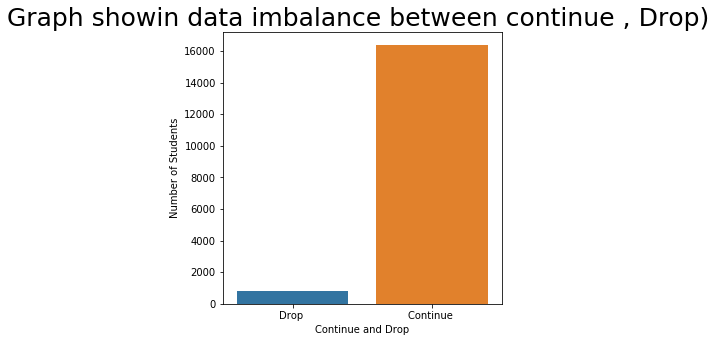

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data = data, x = 'continue_drop')
plt.title("Graph showin data imbalance between continue , Drop) ", fontsize = 25)
plt.xlabel("Continue and Drop", fontsize = 10);
plt.ylabel("Number of Students", fontsize = 10);
labels = ['Continue ','Drop ']
val = [1,0] 
plt.xticks(val, labels);

From the diagram above the iinstance of continue in continue_drop class is higher than drop thus, data imbalance 

<h2>Data balancing</h2>

In [24]:
#handling imbalance class
data_majority = data[data['continue_drop']==1]
data_minority = data[data['continue_drop']==0]

In [25]:
# get class counts 
count_drop,count_continue = data['continue_drop'].value_counts()

#### over sampling majority class

In [26]:
#sampling using sample method
oversmp = data_minority.sample(count_drop,replace=True)

In [27]:
balanced_data = pd.concat([oversmp,data_majority], axis = 0)

### After balancing 

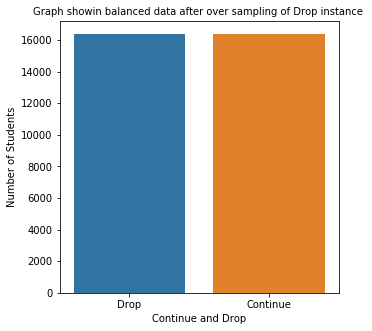

In [28]:
# Visualize the target After balancing
plt.figure(figsize=(5,5))
sns.countplot(balanced_data['continue_drop'])
plt.title("Graph showin balanced data after over sampling of Drop instance ", fontsize = 10)
plt.xlabel("Continue and Drop", fontsize = 10);
plt.ylabel("Number of Students", fontsize = 10);
labels = ['Continue','Drop']
val = [1,0] 
plt.xticks(val, labels);